<div class="cite2c-biblio"></div># 1. Building a Symbolic Regressor


In this short notebook, we detail how to use the *symbolic-pursuit* package that we developped to build a concise symbolic model for a black-box model. Here, the black-box model whe shall use is a *MLP* regressor model for a UCI dataset *wine quality red* <cite data-cite="2480681/TI5B4V8W"></cite>.
Note that our implementation of the meijer G-functions relies on the *pysymbolic* package<cite data-cite="2480681/IH83ZXGR"></cite>.
Let us simply start by importing the package we are going to use.

In [1]:
from datasets.data_loader_UCI import data_loader, mixup  # dataset loader for the UCI dataset
from symbolic_pursuit.models import SymbolicRegressor  # our symbolic model is an instance of this class 
from sklearn.neural_network import MLPRegressor # we use a MLP regressor as the black-box model
from sklearn.metrics import mean_squared_error # we are going to assess the quality of the model based on the generalization MSE
from sympy import init_printing # We use sympy to display mathematical expresssions 
import numpy as np # we use numpy to deal with arrays
init_printing()

We now split the dataset into a trainig and a test subest. All the features are normalized to the range $[0,1]$ and the labels are divided by the average of their absolute value. 

In [2]:
X_train, y_train, X_test, y_test = data_loader("wine-quality-red")

A MLP regressor is fitted to the training subset:

In [3]:
model = MLPRegressor()
model.fit(X_train, y_train)

MLPRegressor()

Now, we shall build the training set for the *symbolic model*. To capture the peculiarities of our black-box, this is done by using a mixup strategy on the original training set <cite data-cite="2480681/H82VI2CA"></cite>. 

In [4]:
X_random = mixup(X_train)

We use these as training points to fit a *symbolic model* to the black-box MLP regressor. 
This model is built by using a projection pursuit strategy <cite data-cite="2480681/AD298KCW"></cite>. Note that the evaluation of Meijer G-functions is slow in the current Python implementations so this step might take a while. 

In [5]:
symbolic_model = SymbolicRegressor()
symbolic_model.fit(model.predict, X_random)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Now working on term number  1 .
Now working on hyperparameter tree number  1 .
         Current function value: 0.000874
         Iterations: 100
         Function evaluations: 4066
         Gradient evaluations: 271
The algorithm stopped because the desired precision was achieved.
The tree number  1  was selected as the best.
Backfitting complete.
The current model has the following expression:  2.02497523215338*[ReLU(P1)]**(-0.574534824570374)*exp(-0.717164049104568*I*pi)*besseli(1.43432809820914, 2.0*sqrt([ReLU(P1)])*exp_polar(I*pi/2))
The current value of the loss is:  0.0008740979630138096 .
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The final model has the following expression:
2.02497523215338*[ReLU(P1)]**(-0.57453482457037

We can now compare the performance of the two models in terms of their MSE evaluated on the test set.

In [6]:
print("MSE score for the MLP Regressor: ", mean_squared_error(y_test, model.predict(X_test)))
print("MSE score for the Symbolic Regressor: ", mean_squared_error(y_test, symbolic_model.predict(X_test)))

MSE score for the MLP Regressor:  0.01293668006861153
MSE score for the Symbolic Regressor:  0.013986550167855516


As we can see, the performance of both model is comparable. The difference between the two model is the fact that the symbolic model is expressed in terms of analytic *Meijer G-functions* whose expression is short and concise. Let us display the epxression for the faithful model we just obtained.

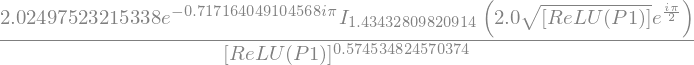

In [7]:
symbolic_model.get_expression()

As we can see, this model only involves one Bessel function.This model is expressed in terms of the following linear combinations of the features:

In [8]:
symbolic_model.print_projections()

P1 =  0.0821157076919267*X1 + 2.2222385474471*X10 + 2.86348529417163*X11 - 2.00819120966791*X2 - 0.0472597539114896*X3 - 0.019596897290765*X4 - 1.52651591902618*X5 - 0.0995295576817738*X6 - 0.74165017805444*X7 + 0.580946231471347*X8 + 0.0842686829440613*X9


## References

<div class="cite2c-biblio"></div>